EDA

In [70]:
import pandas as pd

In [71]:
df = pd.read_csv("https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1667814300249/customer_booking.csv", encoding="ISO-8859-1")
df.head(15)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Data Description:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Necessary data conversion:

In [73]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [74]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [75]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [76]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [83]:
df["trip_type"].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [85]:
df["route"].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [86]:
df["booking_origin"].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [87]:
dummies_sales_channel = pd.get_dummies(df['sales_channel'], prefix='sales_channel').astype(int)
dummies_trip_type = pd.get_dummies(df['trip_type'], prefix='trip_type').astype(int)

KeyError: 'sales_channel'

In [88]:
dummies_route = pd.get_dummies(df['route'], prefix='route').astype(int)
dummies_booking_origin = pd.get_dummies(df['booking_origin'], prefix='booking_origin').astype(int)

In [79]:
df = pd.concat([df, dummies_sales_channel,dummies_trip_type], axis=1)

# Optionally, you can drop the original 'sales_channel' column
df = df.drop(['sales_channel',"trip_type"], axis=1)

In [89]:
df = pd.concat([df, dummies_route,dummies_booking_origin], axis=1)

# Optionally, you can drop the original 'sales_channel' column
df = df.drop(['route',"booking_origin"], axis=1)

In [3]:
!pip install requests
!pip install beautifulsoup4
!pip install nltk

In [7]:
# Importing packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [8]:
import requests
from bs4 import BeautifulSoup

# Function to scrape a single page of reviews
def scrape_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    reviews = soup.find_all('div', class_='text_content')
    return [review.get_text(strip=True) for review in reviews]

# Function to scrape multiple pages
def scrape_all_pages(base_url, total_pages):
    all_reviews = []
    for page_num in range(1, total_pages + 1):
        url = f"{base_url}/page/{page_num}/"
        print(f"Scraping page: {page_num}")
        all_reviews.extend(scrape_page(url))
    return all_reviews

# Function to save reviews to a text file
def save_reviews_to_file(reviews, file_name):
    with open(file_name, 'w', encoding='utf-8') as file:
        for review in reviews:
            file.write(review + '\n')

# Base URL of the Skytrax reviews for British Airways
base_url = 'https://www.airlinequality.com/airline-reviews/british-airways'
total_pages = 383

# Scrape all reviews
all_reviews = scrape_all_pages(base_url, total_pages)

# Define the file name
output_file = 'british_airways_reviews.txt'

# Save reviews to the text file
save_reviews_to_file(all_reviews, output_file)

print(f"Reviews have been saved to {output_file}")


Scraping page: 1
Scraping page: 2
Scraping page: 3
Scraping page: 4
Scraping page: 5
Scraping page: 6
Scraping page: 7
Scraping page: 8
Scraping page: 9
Scraping page: 10
Scraping page: 11
Scraping page: 12
Scraping page: 13
Scraping page: 14
Scraping page: 15
Scraping page: 16
Scraping page: 17
Scraping page: 18
Scraping page: 19
Scraping page: 20
Scraping page: 21
Scraping page: 22
Scraping page: 23
Scraping page: 24
Scraping page: 25
Scraping page: 26
Scraping page: 27
Scraping page: 28
Scraping page: 29
Scraping page: 30
Scraping page: 31
Scraping page: 32
Scraping page: 33
Scraping page: 34
Scraping page: 35
Scraping page: 36
Scraping page: 37
Scraping page: 38
Scraping page: 39
Scraping page: 40
Scraping page: 41
Scraping page: 42
Scraping page: 43
Scraping page: 44
Scraping page: 45
Scraping page: 46
Scraping page: 47
Scraping page: 48
Scraping page: 49
Scraping page: 50
Scraping page: 51
Scraping page: 52
Scraping page: 53
Scraping page: 54
Scraping page: 55
Scraping page: 56
S

In [26]:
import re

# Define the file name
file_name = 'british_airways_reviews.txt'
cleaned_file_name = 'cleaned_british_airways_reviews.txt'

# Function to clean the reviews
def clean_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        # Remove specific phrases
        cleaned_review = re.sub(r'✅Trip Verified\|', '', review)
        cleaned_review = re.sub(r'Not Verified\|', '', cleaned_review)
        cleaned_reviews.append(cleaned_review.strip())
    return cleaned_reviews

# Function to read the contents of the file
def read_reviews_from_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        reviews = file.readlines()
    return reviews

# Function to write the cleaned reviews to a file
def write_reviews_to_file(reviews, file_name):
    with open(file_name, 'w', encoding='utf-8') as file:
        for review in reviews:
            file.write(review + '\n')

# Read the reviews from the file
reviews = read_reviews_from_file(file_name)

# Clean the reviews
cleaned_reviews = clean_reviews(reviews)

# Write the cleaned reviews to a new file
write_reviews_to_file(cleaned_reviews, cleaned_file_name)

print(f"Cleaned reviews have been saved to {cleaned_file_name}")



Cleaned reviews have been saved to cleaned_british_airways_reviews.txt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 most common words:
flight: 7047
ba: 5041
service: 2921
seat: 2441
food: 2418
london: 2260
british: 2232
crew: 2229
airways: 2202
seats: 2168


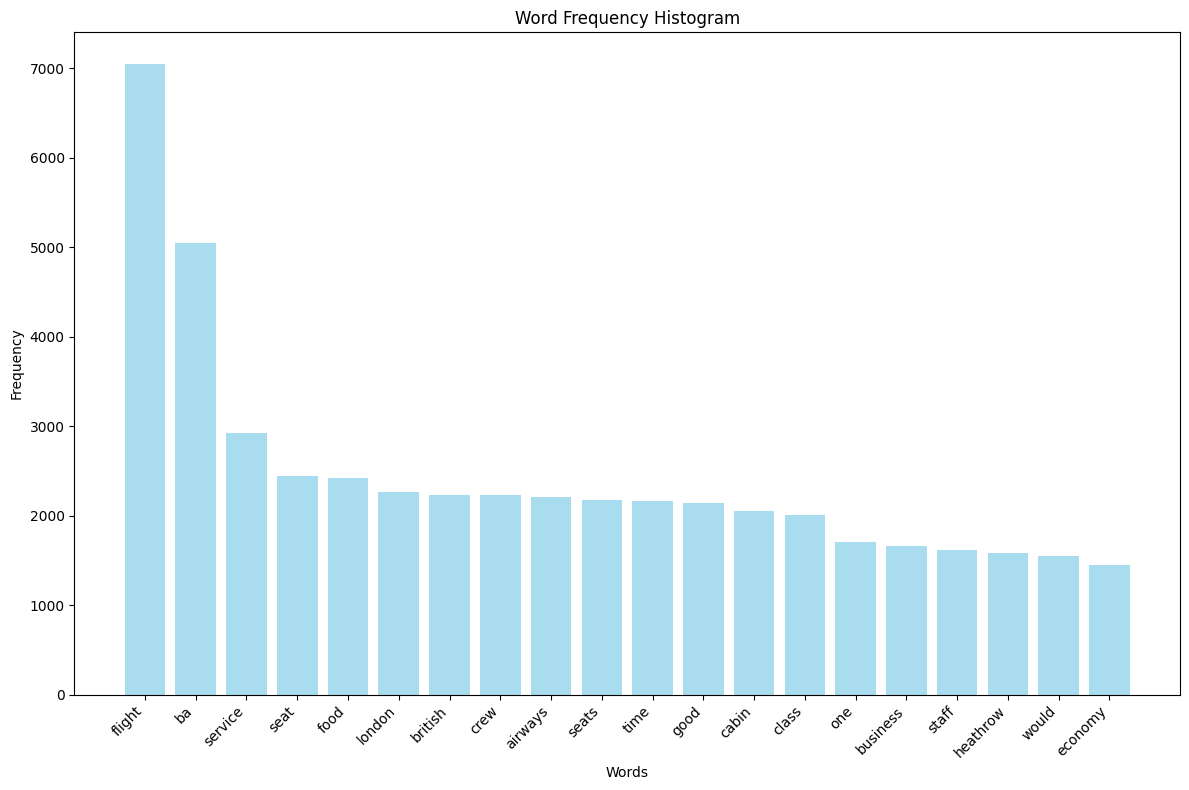

Word frequencies have been saved to word_frequencies.txt


In [31]:
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter

# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'\W+', ' ', text)
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Function to read the contents of the file
def read_reviews_from_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        reviews = file.readlines()
    return reviews

# Function to count word frequencies
def count_word_frequencies(texts):
    word_counts = Counter()
    for text in texts:
        tokens = preprocess_text(text)
        word_counts.update(tokens)
    return word_counts

# Define the file name
file_name = 'cleaned_british_airways_reviews.txt'

# Read the reviews from the file
reviews = read_reviews_from_file(file_name)

# Count word frequencies
word_frequencies = count_word_frequencies(reviews)

# Print the top 10 most common words
print("Top 10 most common words:")
for word, count in word_frequencies.most_common(10):
    print(f"{word}: {count}")

# Create histogram
def plot_word_histogram(word_frequencies, num_words=20):
    # Get the most common words and their counts
    common_words = word_frequencies.most_common(num_words)
    words, counts = zip(*common_words)

    plt.figure(figsize=(12, 8))
    plt.bar(words, counts, color='skyblue', alpha=0.7)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Word Frequency Histogram')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

# Plot histogram for the top 20 words
plot_word_histogram(word_frequencies, num_words=20)

# Optionally, save the word frequencies to a file
output_file_name = 'word_frequencies.txt'
with open(output_file_name, 'w', encoding='utf-8') as file:
    for word, count in word_frequencies.items():
        file.write(f"{word}: {count}\n")

print(f"Word frequencies have been saved to {output_file_name}")



In [34]:
from textblob import TextBlob
import re
import nltk
from collections import Counter

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')

# Define the file name
file_name = 'cleaned_british_airways_reviews.txt'
output_file_name = 'sentiment_analysis_results_with_percentages.txt'

# Function to read the contents of the file
def read_reviews_from_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        reviews = file.readlines()
    return reviews

# Function to perform sentiment analysis using TextBlob
def analyze_sentiments(reviews):
    sentiment_counts = Counter()
    for review in reviews:
        # Create a TextBlob object
        blob = TextBlob(review)
        # Get the polarity of the review
        polarity = blob.sentiment.polarity
        # Classify the polarity
        if polarity > 0:
            sentiment = 'Positive'
        elif polarity < 0:
            sentiment = 'Negative'
        else:
            sentiment = 'Neutral'
        sentiment_counts[sentiment] += 1
    return sentiment_counts

# Read the reviews from the file
reviews = read_reviews_from_file(file_name)

# Perform sentiment analysis
sentiment_counts = analyze_sentiments(reviews)

# Calculate percentages
total_reviews = len(reviews)
percentages = {sentiment: (count / total_reviews) * 100 for sentiment, count in sentiment_counts.items()}

# Save sentiment analysis results to a file
with open(output_file_name, 'w', encoding='utf-8') as file:
    file.write(f"Total Reviews: {total_reviews}\n\n")
    file.write("Sentiment Percentages:\n")
    for sentiment, percentage in percentages.items():
        file.write(f"{sentiment}: {percentage:.2f}%\n")

print(f"Sentiment analysis results with percentages have been saved to {output_file_name}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentiment analysis results with percentages have been saved to sentiment_analysis_results_with_percentages.txt


In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from collections import Counter

# Ensure necessary NLTK data is downloaded
nltk.download('vader_lexicon')

# Define the file name
file_name = 'cleaned_british_airways_reviews.txt'
output_file_name = 'sentiment_analysis_vader_results_with_percentages.txt'

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to read the contents of the file
def read_reviews_from_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        reviews = file.readlines()
    return reviews

# Function to perform sentiment analysis using VADER
def analyze_sentiments_vader(reviews):
    sentiment_counts = Counter()
    for review in reviews:
        # Get sentiment scores
        scores = sia.polarity_scores(review)
        # Extract compound score
        compound = scores['compound']
        # Classify sentiment
        if compound >= 0.05:
            sentiment = 'Positive'
        elif compound <= -0.05:
            sentiment = 'Negative'
        else:
            sentiment = 'Neutral'
        sentiment_counts[sentiment] += 1
    return sentiment_counts

# Read the reviews from the file
reviews = read_reviews_from_file(file_name)

# Perform sentiment analysis using VADER
sentiment_counts_vader = analyze_sentiments_vader(reviews)

# Calculate percentages
total_reviews = len(reviews)
percentages_vader = {sentiment: (count / total_reviews) * 100 for sentiment, count in sentiment_counts_vader.items()}

# Save sentiment analysis results to a file
with open(output_file_name, 'w', encoding='utf-8') as file:
    file.write(f"Total Reviews: {total_reviews}\n\n")
    file.write("Sentiment Percentages:\n")
    for sentiment, percentage in percentages_vader.items():
        file.write(f"{sentiment}: {percentage:.2f}%\n")

print(f"Sentiment analysis results with percentages have been saved to {output_file_name}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment analysis results with percentages have been saved to sentiment_analysis_vader_results_with_percentages.txt


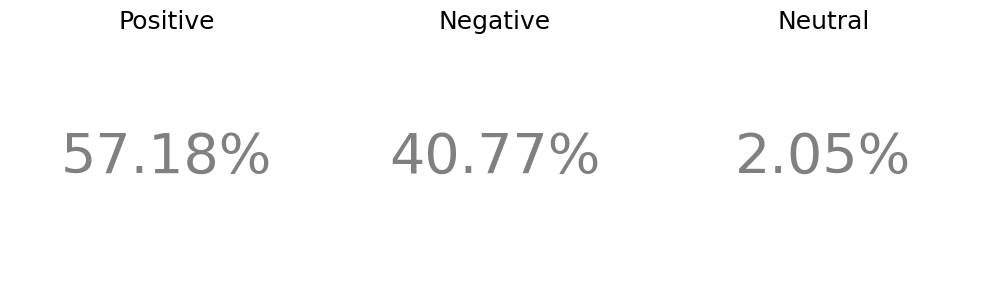

In [44]:
import matplotlib.pyplot as plt

# Sentiment percentages from your analysis
sentiment_data = {
    'Positive': 57.18,
    'Negative': 40.77,
    'Neutral': 2.05
}

# Function to display large figures with labels
def display_sentiment_percentages(data):
    plt.figure(figsize=(10, 6))

    # Create a grid layout for large figures
    num_sentiments = len(data)
    rows = (num_sentiments + 1) // 2  # Adjust number of rows based on sentiment count
    cols = 3

    for i, (sentiment, percentage) in enumerate(data.items()):
        plt.subplot(rows, cols, i + 1)
        plt.text(0.5, 0.5, f'{percentage:.2f}%', fontsize=40, ha='center', va='center', color='grey')
        plt.title(sentiment, fontsize=18)
        plt.axis('off')  # Turn off the axis


    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Adjust title spacing
    plt.show()

# Display sentiment percentages
display_sentiment_percentages(sentiment_data)


In [46]:
pip install scikit-learn matplotlib seaborn

Accuracy: 0.8529
Precision: 0.8142
Recall: 0.8529

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     10648
           1       0.51      0.13      0.21      1852

    accuracy                           0.85     12500
   macro avg       0.69      0.56      0.57     12500
weighted avg       0.81      0.85      0.81     12500



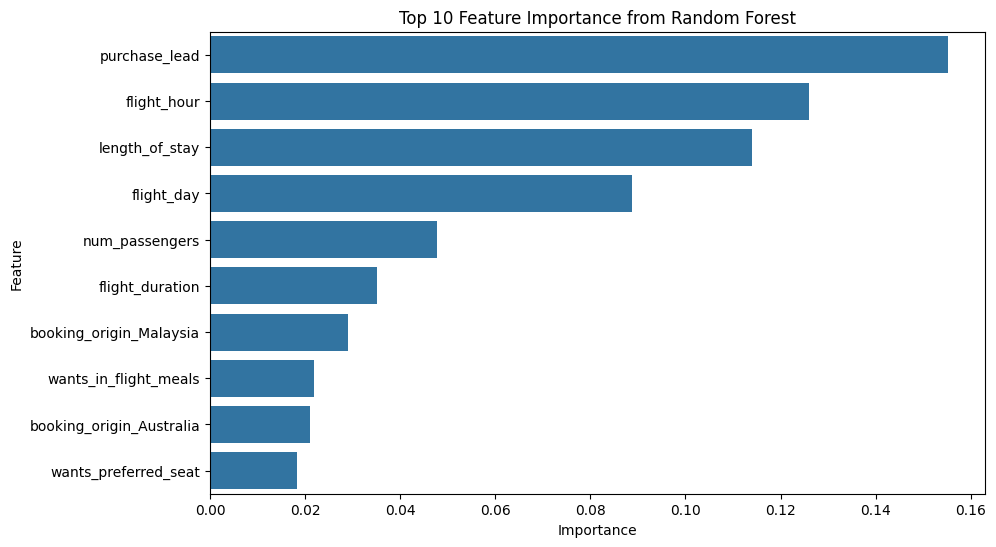

In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Feature columns and target column
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

# Split the data into training and testing sets (75-25 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Random Forest model with 1000 trees
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Derive feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_importance_df = importance_df.head(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_importance_df)
plt.title('Top 10 Feature Importance from Random Forest')
plt.show()
